# Use ChIP seeker to annotate regions

## Add section to config

In [2]:
#function
append_section_to_ini <- function(ini_file, new_section) {
    if (is.list(new_section)) {
        ini <- ini::read.ini(ini_file)
        ini <- c(ini,new_section)
        ini::write.ini(x=ini, filepath=ini_file)
    } else {
        print('new_section is not a list')
    }
}

#list of key-value pairs
CHIPSEEKER <- list(dir='/data/hodges_lab/ATAC-STARR_B-cells/results/results_human-evolution/ChIPSeeker', 
                plots='/data/hodges_lab/ATAC-STARR_B-cells/results/results_human-evolution/ChIPSeeker/plots',
                bin='/data/hodges_lab/ATAC-STARR_B-cells/bin_human-evolution/TSS-annotation/ChIPSeeker.ipynb')

#list of section, resulting in list of list.
new_section <- list(CHIPSEEKER=CHIPSEEKER)

#write ini
append_section_to_ini("../config.ini", new_section)

## Run ChIPseeker

In [27]:
# R kernel
suppressPackageStartupMessages(library(tidyverse))
suppressPackageStartupMessages(library(magrittr))
suppressPackageStartupMessages(library(ChIPseeker))
suppressPackageStartupMessages(library(TxDb.Hsapiens.UCSC.hg38.knownGene))

ini <- ini::read.ini("../config.ini")

In [28]:
my_function <- function(peak) {
    ChIPseeker::annotatePeak(peak, tssRegion = c(-2000, 1000), 
                 TxDb = TxDb.Hsapiens.UCSC.hg38.knownGene,
                 level = "gene",
                 assignGenomicAnnotation = TRUE,
                 addFlankGeneInfo = TRUE)
}

In [29]:
hh_cis <- my_function(ini$CIS_TRANS$`hh-active_mm-inactive_cis-only`)
hh_trans <- my_function(ini$CIS_TRANS$`hh-active_mm-inactive_trans-only`)
hh_cis_trans <- my_function(ini$CIS_TRANS$`hh-active_mm-inactive_cis+trans`)

>> loading peak file...				 2022-09-20 01:59:54 PM 
>> preparing features information...		 2022-09-20 01:59:54 PM 
>> identifying nearest features...		 2022-09-20 01:59:58 PM 
>> calculating distance from peak to TSS...	 2022-09-20 01:59:58 PM 
>> assigning genomic annotation...		 2022-09-20 01:59:58 PM 
>> adding flank feature information from peaks...	 2022-09-20 02:00:06 PM 
>> assigning chromosome lengths			 2022-09-20 02:00:07 PM 
>> done...					 2022-09-20 02:00:07 PM 
>> loading peak file...				 2022-09-20 02:00:07 PM 
>> preparing features information...		 2022-09-20 02:00:07 PM 
>> identifying nearest features...		 2022-09-20 02:00:07 PM 
>> calculating distance from peak to TSS...	 2022-09-20 02:00:07 PM 
>> assigning genomic annotation...		 2022-09-20 02:00:07 PM 
>> adding flank feature information from peaks...	 2022-09-20 02:00:16 PM 
>> assigning chromosome lengths			 2022-09-20 02:00:16 PM 
>> done...					 2022-09-20 02:00:17 PM 
>> loading peak file...				 2022-09-20 0

In [30]:
mm_cis <- my_function(ini$CIS_TRANS$`mm-active_hh-inactive_cis-only`)
mm_trans <- my_function(ini$CIS_TRANS$`mm-active_hh-inactive_trans-only`)
mm_cis_trans <- my_function(ini$CIS_TRANS$`mm-active_hh-inactive_cis+trans`)

>> loading peak file...				 2022-09-20 02:00:29 PM 
>> preparing features information...		 2022-09-20 02:00:29 PM 
>> identifying nearest features...		 2022-09-20 02:00:29 PM 
>> calculating distance from peak to TSS...	 2022-09-20 02:00:29 PM 
>> assigning genomic annotation...		 2022-09-20 02:00:29 PM 
>> adding flank feature information from peaks...	 2022-09-20 02:00:38 PM 
>> assigning chromosome lengths			 2022-09-20 02:00:38 PM 
>> done...					 2022-09-20 02:00:38 PM 
>> loading peak file...				 2022-09-20 02:00:38 PM 
>> preparing features information...		 2022-09-20 02:00:38 PM 
>> identifying nearest features...		 2022-09-20 02:00:38 PM 
>> calculating distance from peak to TSS...	 2022-09-20 02:00:39 PM 
>> assigning genomic annotation...		 2022-09-20 02:00:39 PM 
>> adding flank feature information from peaks...	 2022-09-20 02:00:47 PM 
>> assigning chromosome lengths			 2022-09-20 02:00:47 PM 
>> done...					 2022-09-20 02:00:47 PM 
>> loading peak file...				 2022-09-20 0

Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.



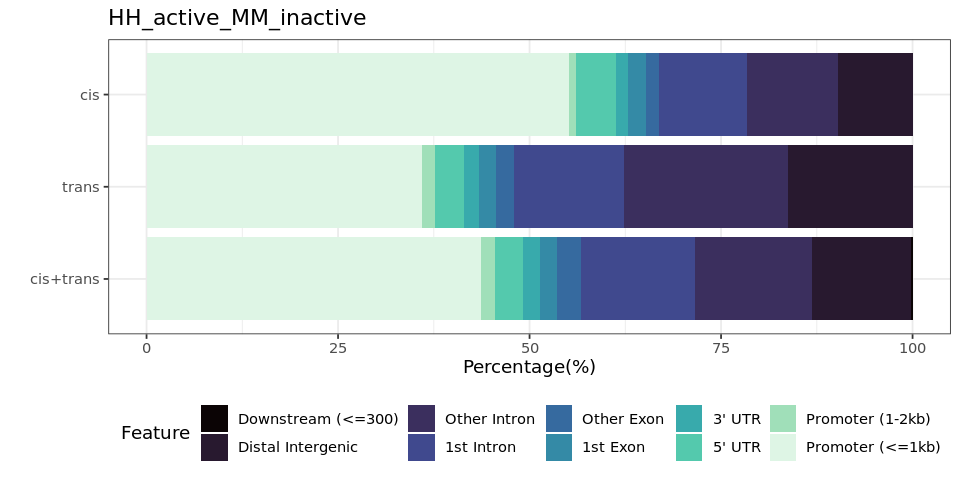

In [32]:
#annotation plots: 
p <- plotAnnoBar(list(cis = hh_cis, trans = hh_trans, `cis+trans` = hh_cis_trans))

options(repr.plot.width = 8, repr.plot.height = 4)
p2 <- p + theme(legend.position = "bottom") + ggtitle("HH_active_MM_inactive") + scale_fill_viridis_d(option = "mako")
     
p2 

ggsave(plot = p2, filename = paste0(ini$CHIPSEEKER$plots, "/HH_active_MM_inactive_TSS-distribution.pdf"), device=cairo_pdf, height = 4, width = 8)

Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.



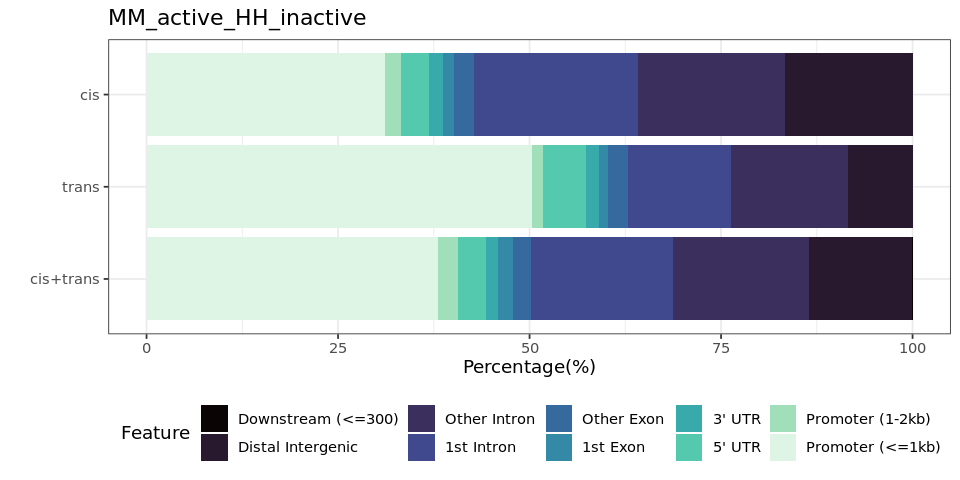

In [33]:
#annotation plots: 
p <- plotAnnoBar(list(cis = mm_cis, trans = mm_trans, `cis+trans` = mm_cis_trans))

options(repr.plot.width = 8, repr.plot.height = 4)
p2 <- p + theme(legend.position = "bottom") + ggtitle("MM_active_HH_inactive") + scale_fill_viridis_d(option = "mako")
p2

ggsave(p2, filename = paste0(ini$CHIPSEEKER$plots, "/MM_active_HH_inactive_TSS-distribution.pdf"), device = cairo_pdf, height = 4, width = 8)

## Combine across species

In [34]:
# R kernel
suppressPackageStartupMessages(library(tidyverse))
suppressPackageStartupMessages(library(magrittr))
suppressPackageStartupMessages(library(ChIPseeker))
suppressPackageStartupMessages(library(TxDb.Hsapiens.UCSC.hg38.knownGene))

ini <- ini::read.ini("../config.ini")

columns <- c("chr", "start", "end")

In [35]:
hh_cis <- read_tsv(ini$CIS_TRANS$`hh-active_mm-inactive_cis-only`, col_names = columns)
mm_cis <- read_tsv(ini$CIS_TRANS$`mm-active_hh-inactive_cis-only`, col_names = columns)

cis <- bind_rows(hh_cis, mm_cis)

Rows: 1114 Columns: 3

── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (1): chr
dbl (2): start, end


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

Rows: 1040 Columns: 3

── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (1): chr
dbl (2): start, end


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.



In [36]:
hh_trans <- read_tsv(ini$CIS_TRANS$`hh-active_mm-inactive_trans-only`, col_names = columns)
mm_trans <- read_tsv(ini$CIS_TRANS$`mm-active_hh-inactive_trans-only`, col_names = columns)

trans <- bind_rows(hh_trans, mm_trans)

Rows: 812 Columns: 3

── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (1): chr
dbl (2): start, end


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

Rows: 1171 Columns: 3

── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (1): chr
dbl (2): start, end


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.



In [37]:
hh_ct <- read_tsv(ini$CIS_TRANS$`hh-active_mm-inactive_cis+trans`, col_names = columns)
mm_ct <- read_tsv(ini$CIS_TRANS$`mm-active_hh-inactive_cis+trans`, col_names = columns)

cis_trans <- bind_rows(hh_ct, mm_ct)

Rows: 4631 Columns: 3

── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (1): chr
dbl (2): start, end


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

Rows: 3994 Columns: 3

── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (1): chr
dbl (2): start, end


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.



In [38]:
cons_act <- read_tsv(ini$`HH-VS-MM`$conserved_active, col_names = columns)

Rows: 3034 Columns: 3

── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (1): chr
dbl (2): start, end


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.



In [39]:
cis <- GenomicRanges::makeGRangesFromDataFrame(cis)
trans <- GenomicRanges::makeGRangesFromDataFrame(trans)
cis_trans <- GenomicRanges::makeGRangesFromDataFrame(cis_trans)
cons_act <- GenomicRanges::makeGRangesFromDataFrame(cons_act)

In [40]:
cis <- my_function(cis)
trans <- my_function(trans)
cis_trans <- my_function(cis_trans)
cons_act <- my_function(cons_act)

>> preparing features information...		 2022-09-20 02:01:48 PM 
>> identifying nearest features...		 2022-09-20 02:01:48 PM 
>> calculating distance from peak to TSS...	 2022-09-20 02:01:48 PM 
>> assigning genomic annotation...		 2022-09-20 02:01:48 PM 
>> adding flank feature information from peaks...	 2022-09-20 02:01:58 PM 
>> assigning chromosome lengths			 2022-09-20 02:01:59 PM 
>> done...					 2022-09-20 02:01:59 PM 
>> preparing features information...		 2022-09-20 02:01:59 PM 
>> identifying nearest features...		 2022-09-20 02:01:59 PM 
>> calculating distance from peak to TSS...	 2022-09-20 02:02:00 PM 
>> assigning genomic annotation...		 2022-09-20 02:02:00 PM 
>> adding flank feature information from peaks...	 2022-09-20 02:02:08 PM 
>> assigning chromosome lengths			 2022-09-20 02:02:09 PM 
>> done...					 2022-09-20 02:02:09 PM 
>> preparing features information...		 2022-09-20 02:02:09 PM 
>> identifying nearest features...		 2022-09-20 02:02:09 PM 
>> calculating dista

Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.



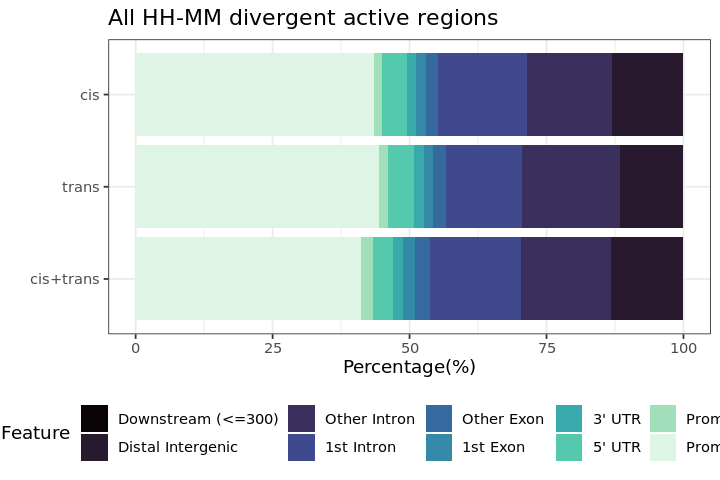

In [41]:
#annotation plots: 
p <- plotAnnoBar(list(cis = cis, trans = trans, `cis+trans` = cis_trans))

options(repr.plot.width = 6, repr.plot.height = 4)
p2 <- p + theme(legend.position = "bottom") + ggtitle("All HH-MM divergent active regions") + scale_fill_viridis_d(option = "mako")
p2

ggsave(plot = p2, filename = paste0(ini$CHIPSEEKER$plots, "/all_TSS-distribution.pdf"), device=cairo_pdf, height = 4, width = 6)

Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.



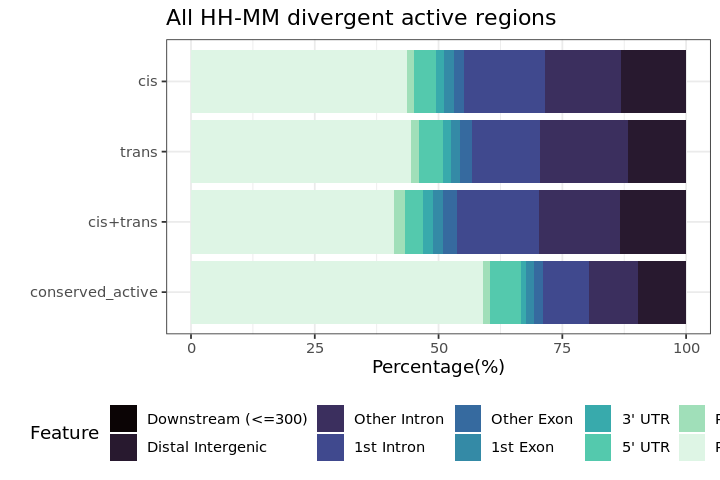

In [42]:
#annotation plots: 
p <- plotAnnoBar(list(cis = cis, trans = trans, `cis+trans` = cis_trans, conserved_active = cons_act))

options(repr.plot.width = 6, repr.plot.height = 4)
p2 <- p + theme(legend.position = "bottom") + ggtitle("All HH-MM divergent active regions") + scale_fill_viridis_d(option = "mako")
p2

ggsave(plot = p2, filename = paste0(ini$CHIPSEEKER$plots, "/all_TSS-distribution_w-cons-act.pdf"), device=cairo_pdf, height = 4, width = 6)